In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
df = pd.read_csv(r"c:\Users\selle\Downloads\shipping.csv")
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [3]:
# Renaming the Reached.on.Time_Y.N to be more readable
df.rename(columns={"Reached.on.Time_Y.N":"on_time"}, inplace=True)

# Lowercase all column names
df = df.rename(columns={col: col.lower() for col in df.columns})

In [4]:
df.head()

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,on_time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
# Printing unique values for each field in the dataframe to get a better
# understanding of the data that we are working with
for column in df.columns:
    unique_values = df[column].nunique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in id: 10999
Unique values in warehouse_block: 5
Unique values in mode_of_shipment: 3
Unique values in customer_care_calls: 6
Unique values in customer_rating: 5
Unique values in cost_of_the_product: 215
Unique values in prior_purchases: 8
Unique values in product_importance: 3
Unique values in gender: 2
Unique values in discount_offered: 65
Unique values in weight_in_gms: 4034
Unique values in on_time: 2


In [6]:
# Checking for null values. If null values are found then we will work to
# fill/replace/drop them
df.isnull().sum()

id                     0
warehouse_block        0
mode_of_shipment       0
customer_care_calls    0
customer_rating        0
cost_of_the_product    0
prior_purchases        0
product_importance     0
gender                 0
discount_offered       0
weight_in_gms          0
on_time                0
dtype: int64

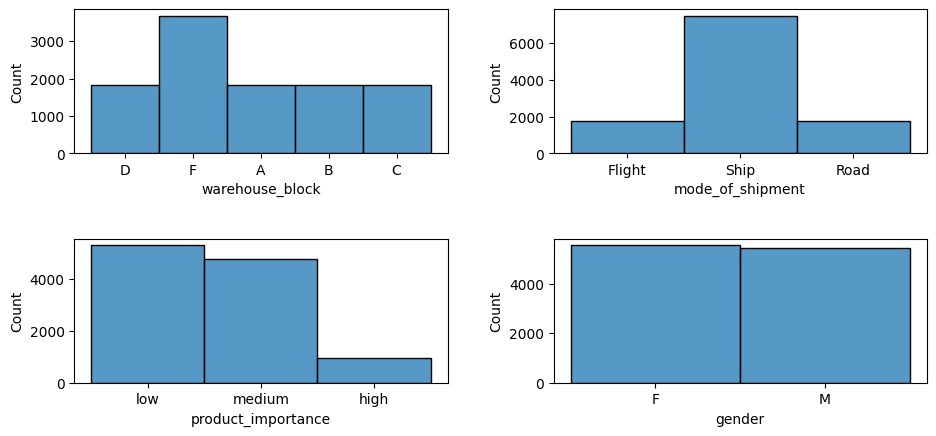

In [7]:
# Plot multiple histograms side by side
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed

# Plot multiple histograms side by side in two rows and two columns
for i, column in enumerate(df.select_dtypes(exclude=np.number)):
    plt.subplot(2, 2, i+1)  # Create subplot for each column
    plt.xlabel(xlabel=f"{column}")
    sns.histplot(df[column])  # Plot histogram using Seaborn

plt.tight_layout(pad=3.0)  # Adjust subplot layout to prevent overlap
plt.show()

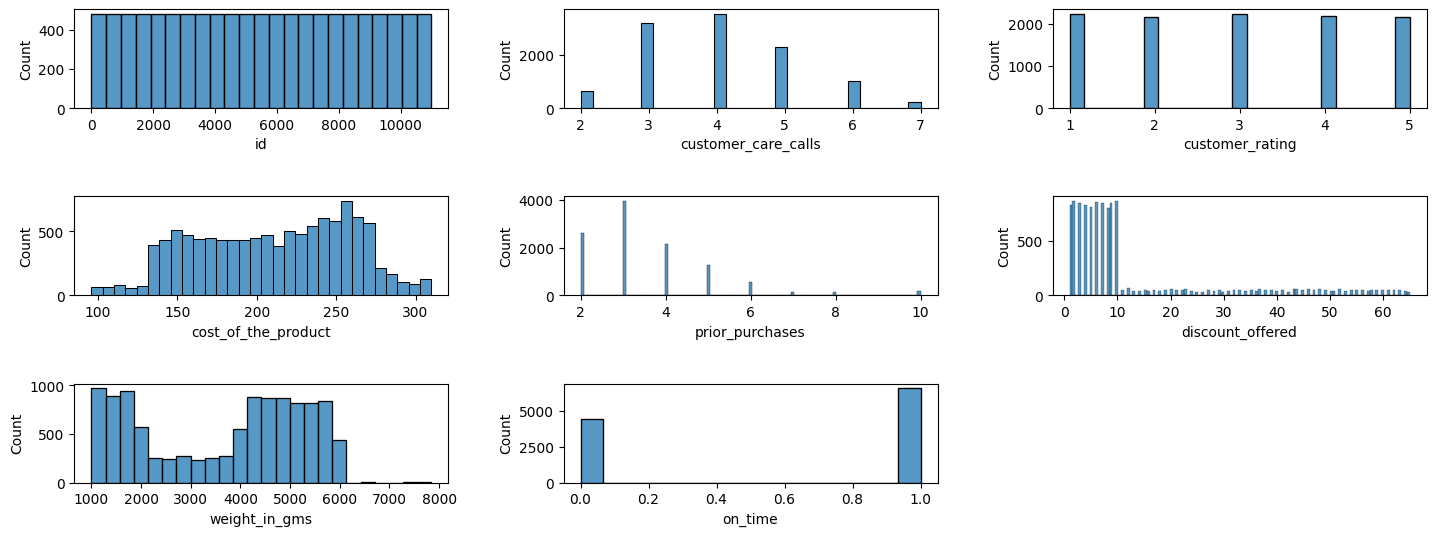

In [8]:
# Plot multiple histograms side by side
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed

# Plot multiple histograms side by side in two rows and two columns
for i, column in enumerate(df.select_dtypes(include=np.number)):
    plt.subplot(3, 3, i+1)  # Create subplot for each column
    plt.xlabel(xlabel=f"{column}")
    sns.histplot(df[column])  # Plot histogram using Seaborn

plt.tight_layout(pad=3.0)  # Adjust subplot layout to prevent overlap
plt.show()

In [9]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Separate numerical and non-numerical features
numerical_features = df.select_dtypes(include=np.number).columns

# Normalize numerical features only
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,on_time
0,0.000000,D,Flight,0.4,0.25,0.378505,0.125,low,F,0.671875,0.033893,1.0
1,0.000091,F,Flight,0.4,1.00,0.560748,0.000,low,M,0.906250,0.304894,1.0
2,0.000182,A,Flight,0.0,0.25,0.406542,0.250,low,M,0.734375,0.346676,1.0
3,0.000273,B,Flight,0.2,0.50,0.373832,0.250,medium,M,0.140625,0.025712,1.0
4,0.000364,C,Flight,0.0,0.25,0.411215,0.125,medium,F,0.703125,0.216654,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,0.999636,A,Ship,0.4,0.00,0.728972,0.375,medium,F,0.000000,0.078451,1.0
10995,0.999727,B,Ship,0.4,0.00,0.635514,0.375,medium,F,0.078125,0.035939,0.0
10996,0.999818,C,Ship,0.6,0.75,0.682243,0.375,low,F,0.046875,0.022498,0.0
10997,0.999909,F,Ship,0.6,0.25,0.593458,0.500,medium,M,0.015625,0.030533,0.0


In [10]:
# Select non-numerical features
non_numerical_features = df.select_dtypes(exclude=['float64', 'int64']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Label encode non-numerical features
for feature in non_numerical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

df

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,on_time
0,0.000000,3,0,0.4,0.25,0.378505,0.125,1,0,0.671875,0.033893,1.0
1,0.000091,4,0,0.4,1.00,0.560748,0.000,1,1,0.906250,0.304894,1.0
2,0.000182,0,0,0.0,0.25,0.406542,0.250,1,1,0.734375,0.346676,1.0
3,0.000273,1,0,0.2,0.50,0.373832,0.250,2,1,0.140625,0.025712,1.0
4,0.000364,2,0,0.0,0.25,0.411215,0.125,2,0,0.703125,0.216654,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,0.999636,0,2,0.4,0.00,0.728972,0.375,2,0,0.000000,0.078451,1.0
10995,0.999727,1,2,0.4,0.00,0.635514,0.375,2,0,0.078125,0.035939,0.0
10996,0.999818,2,2,0.6,0.75,0.682243,0.375,1,0,0.046875,0.022498,0.0
10997,0.999909,4,2,0.6,0.25,0.593458,0.500,2,1,0.015625,0.030533,0.0


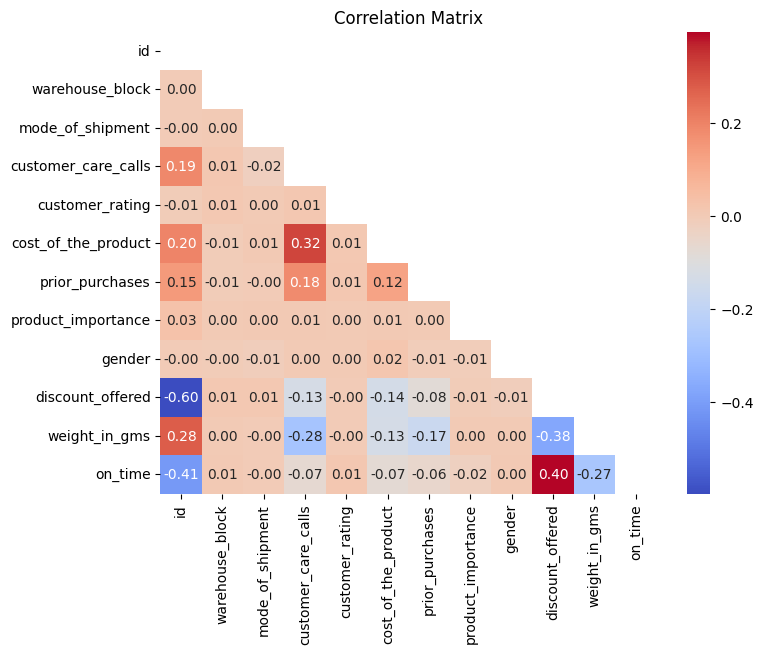

In [11]:
# Calculate correlation matrix to check for linearity between all variables
correlation_matrix = df.corr()

# Creating a mask to hide the upper half of the matrix since it is the mirrored
# values of the bottom half
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)  # Plot heatmap with annotations
plt.title('Correlation Matrix')  # Add title
plt.show()

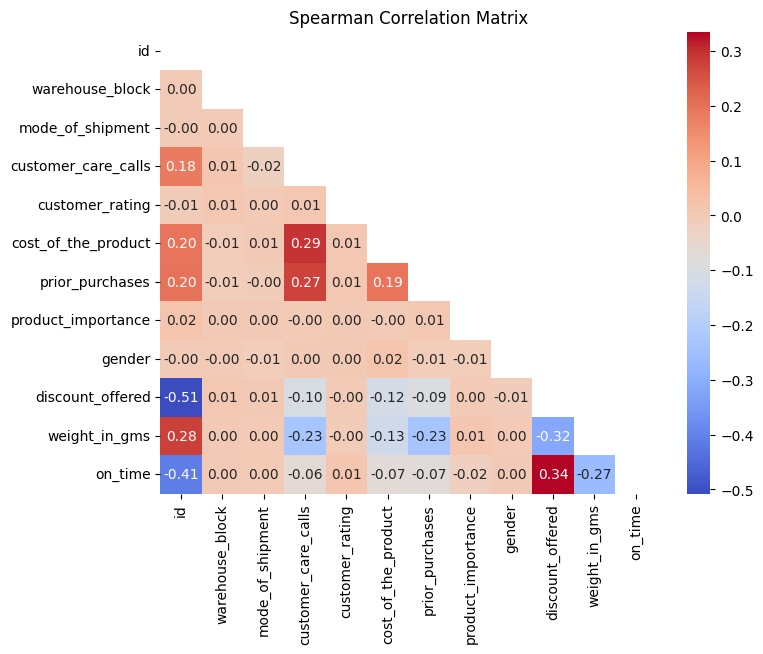

In [12]:
# Calculate Spearman correlation matrix so that we can test for non-linear correlations
spearman_corr_matrix = df.corr(method='spearman')

# Plot Spearman correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Spearman Correlation Matrix')
plt.show()

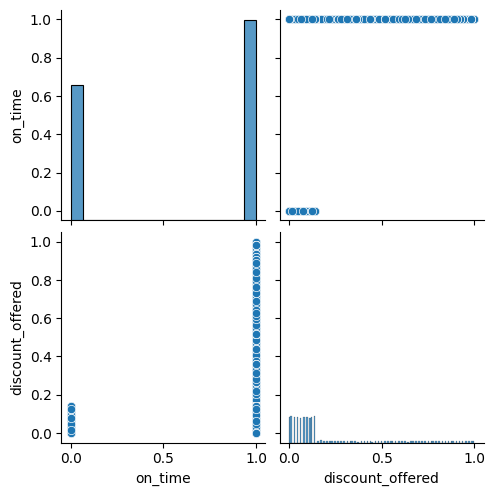

In [13]:
# numerical_features = df.select_dtypes(include=np.number).columns
sns.pairplot(df[['on_time', "discount_offered"]])
plt.show()

In [16]:
# Creating y and X variable to store the label and feature(s) to
# later split into training, validation, and testing sets
X = df.drop(["on_time"], axis=1)
y = df["on_time"]

# We will now split the data into two sets being training and remaining
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=0, stratify=df["on_time"])

# Now we split the remaining set into two sets being the validation and testing
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.5, random_state=0, stratify=df["on_time"])

In [22]:
# Checking the shape to ensure data was successfully and correctly split
# according to the train_size and test_size parameters

print(
    f"{X_train.shape = }", f"{y_train.shape = }",
    f"\n{X_val.shape = }", f"{y_val.shape = }",
    f"\n{X_test.shape = }", f"{y_test.shape = }",
)

X_train.shape = (7699, 11) y_train.shape = (7699,) 
X_val.shape = (5499, 11) y_val.shape = (5499,) 
X_test.shape = (5500, 11) y_test.shape = (5500,)


In [64]:
# Now we will train our model using deep learning neural networks

# Building out the neural network
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(10, activation="relu"))
model1.add(tf.keras.layers.Dense(1))

# Compiling the model to later fit it
learning_rate = 0.1
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model1.compile(
    loss = "mse",
    optimizer=optimizer,
    metrics = [tf.keras.losses.mean_squared_error]
)

es = tf.keras.callbacks.EarlyStopping(monitor="loss", )

# Fitting the model with training and validation data
history = model1.fit(X_train, y_train, epochs=100, batch_size=50, validation_data=(X_val, y_val), verbose=2)

Epoch 1/100
154/154 - 1s - 7ms/step - loss: 0.2121 - mean_squared_error: 0.2121 - val_loss: 0.1850 - val_mean_squared_error: 0.1850
Epoch 2/100
154/154 - 0s - 2ms/step - loss: 0.1888 - mean_squared_error: 0.1888 - val_loss: 0.1889 - val_mean_squared_error: 0.1889
Epoch 3/100
154/154 - 0s - 2ms/step - loss: 0.1872 - mean_squared_error: 0.1872 - val_loss: 0.1832 - val_mean_squared_error: 0.1832
Epoch 4/100
154/154 - 0s - 1ms/step - loss: 0.1881 - mean_squared_error: 0.1881 - val_loss: 0.1848 - val_mean_squared_error: 0.1848
Epoch 5/100
154/154 - 0s - 1ms/step - loss: 0.1882 - mean_squared_error: 0.1882 - val_loss: 0.1899 - val_mean_squared_error: 0.1899
Epoch 6/100
154/154 - 0s - 1ms/step - loss: 0.1892 - mean_squared_error: 0.1892 - val_loss: 0.1847 - val_mean_squared_error: 0.1847
Epoch 7/100
154/154 - 0s - 2ms/step - loss: 0.1884 - mean_squared_error: 0.1884 - val_loss: 0.1967 - val_mean_squared_error: 0.1967
Epoch 8/100
154/154 - 1s - 5ms/step - loss: 0.1900 - mean_squared_error: 0.1

In [65]:
# Evaluate the model on the test data
test_loss, test_accuracy = model1.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

172/172 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1835 - mean_squared_error: 0.1835
Test Loss: 0.18345917761325836
Test Accuracy: 0.18345467746257782
